In [2]:
import geopandas as gpd
regions = gpd.read_file('./data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp')

regions.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


### SHP files have a defined Coordinate Reference System(CRS). We have to define it specifically for data loaded from a csv file

epsg:32630


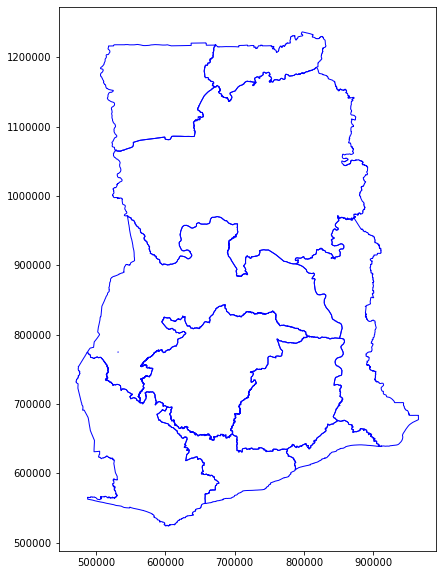

In [5]:
regions.plot(figsize=(10, 10), color='none', edgecolor='blue')
print(regions.crs)

In [8]:
# Read from csv
import pandas as pd
health_facilities_df = pd.read_csv('./data/ghana/ghana/health_facilities.csv')
health_facilities_df.head()

# Define a geometry
health_facilities = gpd.GeoDataFrame(health_facilities_df, geometry=gpd.points_from_xy(health_facilities_df.Longitude,
                                                                                       health_facilities_df.Latitude))
health_facilities.crs = {'init': 'epsg:4326'}

health_facilities.head()

c:\softwares\python3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


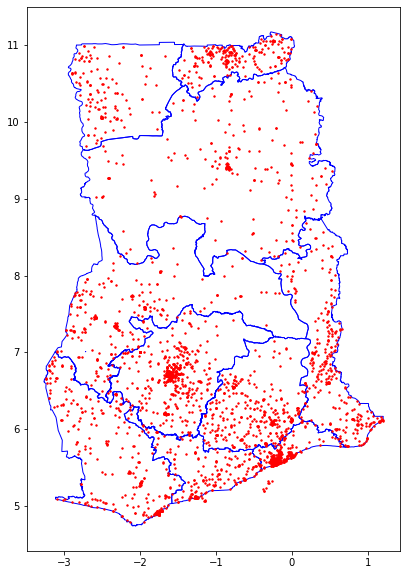

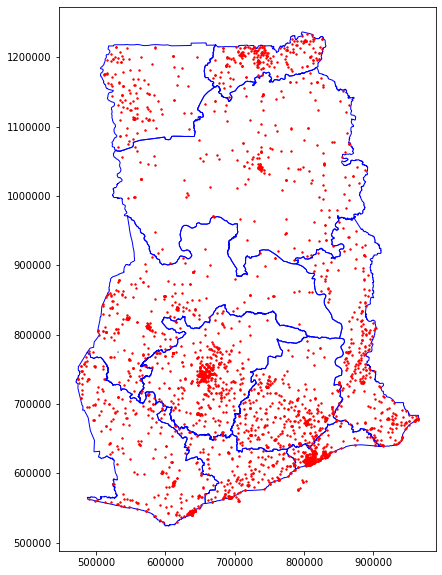

In [18]:
ax = regions.to_crs(epsg=4326).plot(figsize=(10, 10), color='None', edgecolor='blue')

# Need to modify crs to plot these correctly
health_facilities.plot(color='red', markersize=2, ax=ax)

ax1 = regions.plot(figsize=(10, 10), color='None', edgecolor='blue')
health_facilities.to_crs(epsg=32630).plot(color='red', markersize=2, ax=ax1)


In [19]:
regions.to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs').head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [23]:
regions["Area"] = regions.geometry.area / 10**6
print("Area : {} sqKm".format(regions.Area.sum()))

Area : 239584.5760055668 sqKm
